In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("TSLA.csv", index_col ="Date", parse_dates = True)

In [7]:
data.shape

(2416, 6)

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
Dataset contains following fields
Date -
Each trading day Open 
Open price of stock High 
High price of stock in the particular day Low 
Low price of the stock in the particular day Close 
Close price of the stock at end of the day Adj Close 
Adjusted close price of stock * 
Volume - Volume traded in the entire day

The price quoted at the end of the trading day is the price of the last lot of stock is referred to as the stock's closing price.
The adjusted closing price is often used when performing a detailed analysis of historical returns.

Text(0.5, 1.0, 'Volume Of Shares Traded')

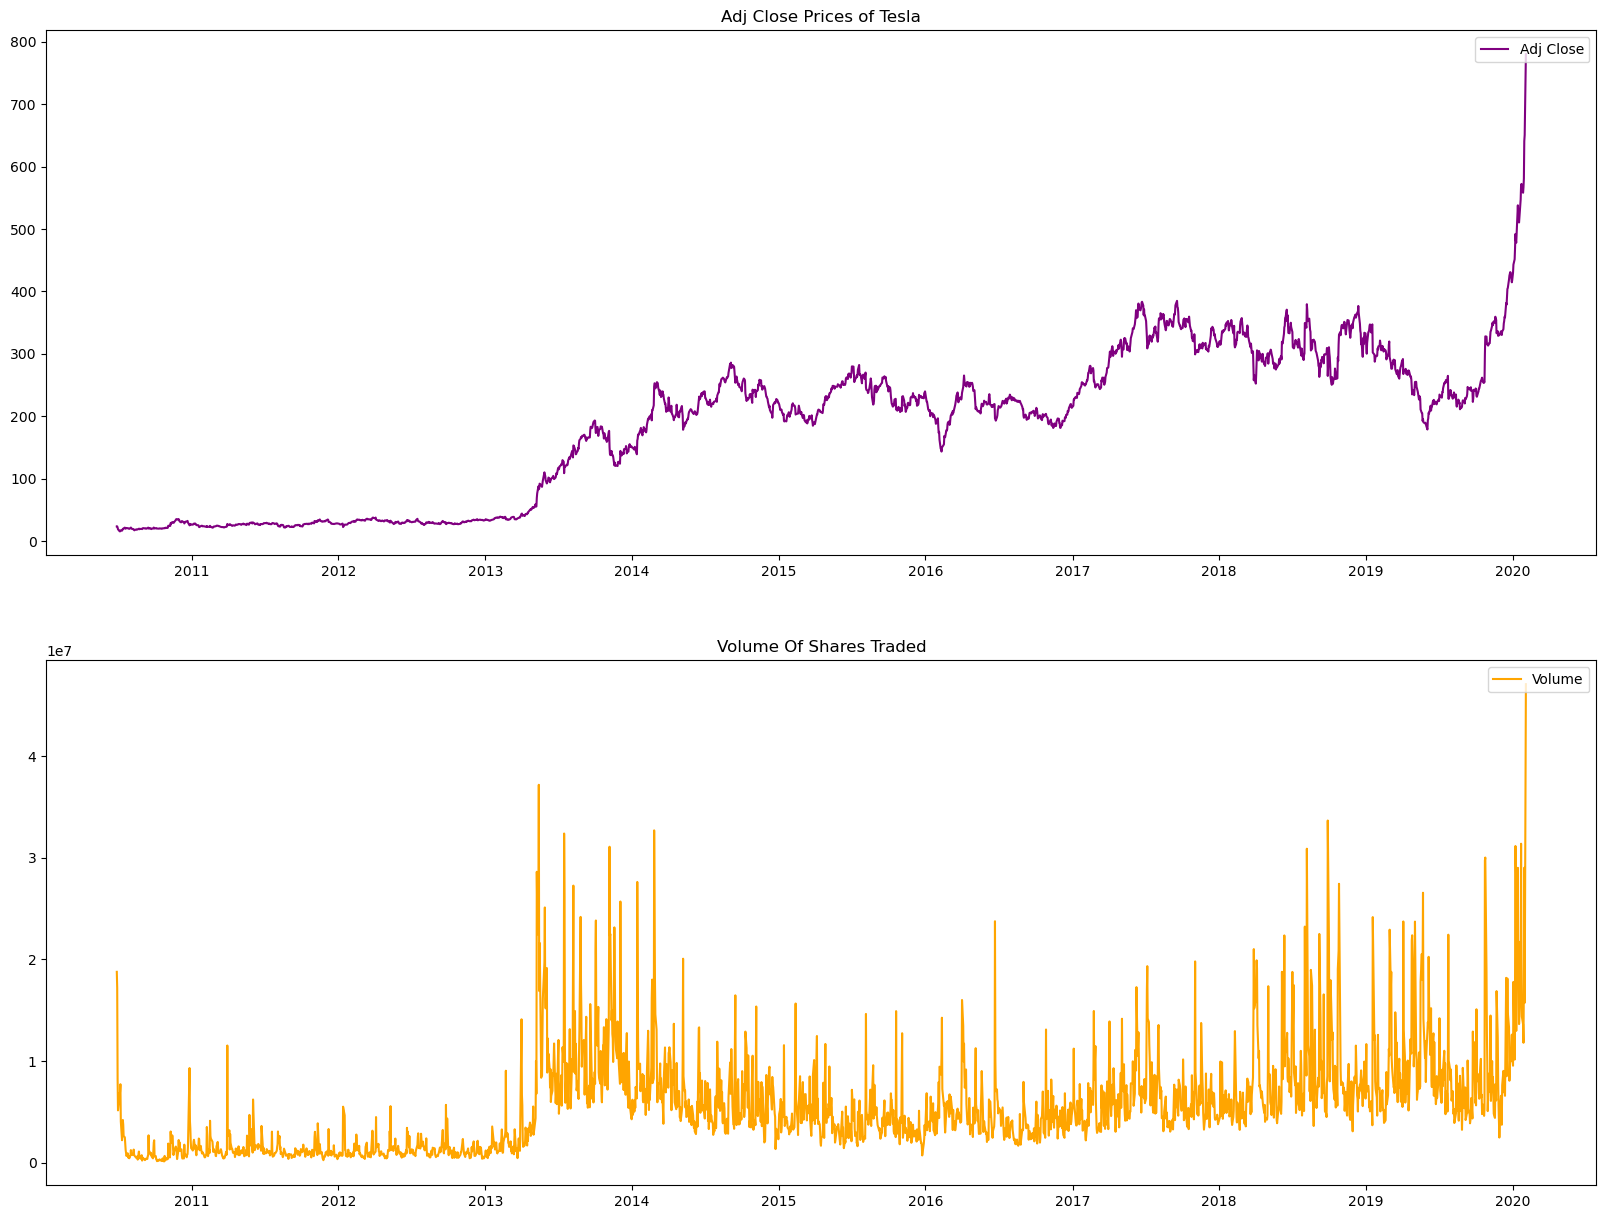

In [9]:
plt.figure(figsize=(20, 15))

plt.subplot(2,1,1)
plt.plot(data['Adj Close'], label='Adj Close', color="purple")
plt.legend(loc="upper right")
plt.title('Adj Close Prices of Tesla')

plt.subplot(2,1,2)
plt.plot(data['Volume'], label='Volume', color="Orange")
plt.legend(loc="upper right")
plt.title('Volume Of Shares Traded')

A Time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

Need of Time series is:
To understand seasonal patterns.
Evaluate current progress.
Forecasting of observations

Types of Time Series:
Trend - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

Trend and Seasonal are non stationary, so they effect the value of time series.

We can apply some sort of transformation to make the time-series stationary. These transformation may include:
1)split the series in 2 parts
2)compute statistics like mean,variance,autocorrelation
3)If statistics are different then they are not stationary as stationary means constant mean and constant variation.
4)Another popular test is Unit ROOT test.ADF

 # Check for Stationarity - ADF Test
 
ADF (Augmented Dickey Fuller test) test is is the most commonly used test to detect stationarity.It determines the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root.
Alternate Hypothesis: The series has no unit root.
If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.
If Pvalue is less  than 0.05 than we reject null hypothesis.



In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Adj Close'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.4000685020861614
p-value: 0.9971144530803391
Critial Values:
   1%, -3.4330810457844425
Critial Values:
   5%, -2.862746538733181
Critial Values:
   10%, -2.567412291147901


Since p-value is greater than 0.05, so we fail to reject the null hypothesis here. And accept the null-hypothesis that, the series is non-stationary.

# ACF and PACF Plot

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.
We plot these values along with the confidence band to have an ACF plot.
In simple terms, it describes how well the present value of the series is related with its past values.
A time series can have components like trend, seasonality, cyclic and residual.
ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.
ACF tells is the observed time series white noise/random?
The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

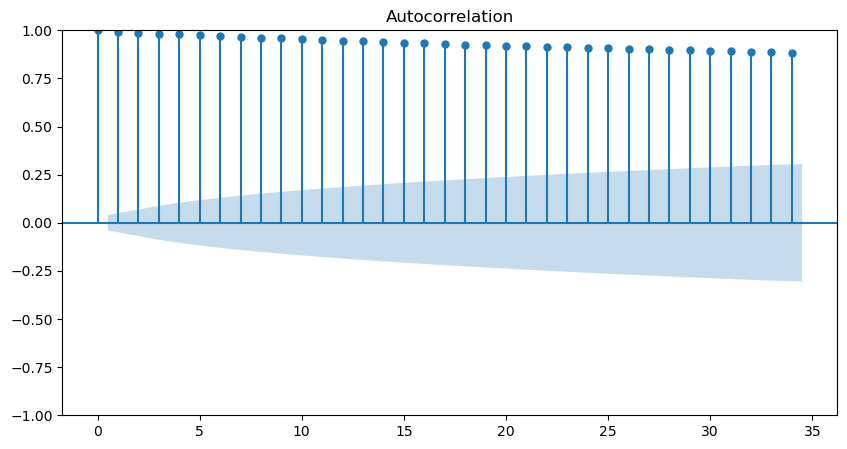

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

plt.rc("figure", figsize=(10,5))
plot_acf(data['Adj Close'])
print()

Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.
The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.
Additionally, you can see a blue area in the ACF and PACF plots.
This blue area depicts the 95% confidence interval and is an indicator of the significance threshold.
That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

C:\Users\rinki\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


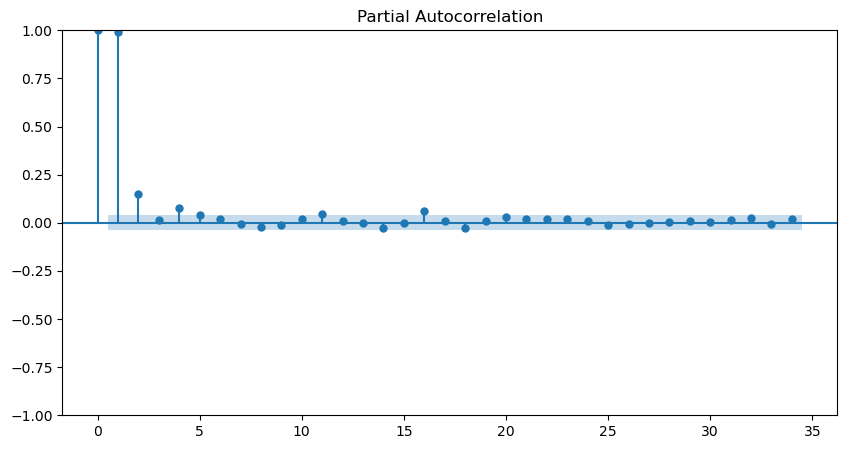

In [12]:
plt.rc("figure", figsize=(10,5))
plot_pacf(data['Adj Close'])
print()

Before working with non-stationary data, the Autoregressive Integrated Moving Average (ARIMA) Model converts it to stationary data. One of the most widely used models for predicting linear time series data is this one.

The ARIMA model has been widely utilized in banking and economics since it is recognized to be reliable, efficient, and capable of predicting short-term share market movements.

The two values, A and B (A’s previous value), are now linked in such a way that A’s current value is predicated on A’s previous value. As a result, any future value for A will be determined by its current value.

  An ARIMA model is delineated by three terms: p, d, q where,
p is a particular order of the AR term
q is a specific order of the MA term
d is the number of differences wanted to make the time series stationary

If a time series has seasonal patterns, then you require to add seasonal terms, and it converts to SARIMA, which stands for ‘Seasonal ARIMA’.

The ‘Auto Regressive’ in ARIMA indicates a linear regression model that employs its lags as predictors. Linear regression models work best if the predictors are not correlated and remain independent of each other. We want to make them stationary, and the standard approach is to differentiate them. This means subtracting the initial value from the current value. Concerning how complex the series gets, more than one difference may be required.


In [ ]:
Here upto Lag-value 2, we have strong correlation. So we can keep lag value 2 for our further experiments.

#  Develop ARIMA model
# Split in train and test data

In [11]:
# To install the library for AUTOARIMA
!pip install pmdarima 

                                              0.0/566.2 kB ? eta -:--:--
     ---------------                        225.3/566.2 kB 6.7 MB/s eta 0:00:01
     ------------------------------------   542.7/566.2 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 5.1 MB/s eta 0:00:00
  Using cached Cython-3.0.0-cp311-cp311-win_amd64.whl (2.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [12]:
# Import the library 
from pmdarima import auto_arima 

In [14]:
 #Fit AUTOARIMA Function
import warnings 
warnings.filterwarnings("ignore") 
  
 
stepwise_fit = auto_arima(data['Adj Close'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',    # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=21970.183, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=17028.214, Time=1.76 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=19900.707, Time=2.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=22003.517, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=17605.617, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=16843.757, Time=5.47 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.71 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.78 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=21958.391, Time=4.00 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=16845.755, Time=6.76 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=16845.756, Time=7.02 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=19895.894, Time=5.23 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=16845.964, Time=9.90 sec
 ARIMA(1,0,0)(2,1,0)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2416
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -8417.546
Date:                            Sun, 20 Aug 2023   AIC                          16843.093
Time:                                    00:40:44   BIC                          16866.232
Sample:                                         0   HQIC                         16851.510
                                           - 2416                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9892      0.003    322.634      0.000       0.983       0.995
ar.S.L12      -0.6501      0.012    -53.828      0.000      -0.674      -0.626
ar.S.L24      -0.2991      0.015    -20.429      0.000      -0.328      -0.270
sigma2        64.1741      0.671     95.605      0.000      62.858      65.490
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            154357.46
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              27.45   Skew:                             2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Split data into train / test sets 
train = data.iloc[:len(data)-12] 
test = data.iloc[len(data)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(1, 0, 2)x(0, 1, [1], 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Adj Close'],  
                order = (1, 0, 2),  
                seasonal_order =(0, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Adj Close   No. Observations:                 2404
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -7861.053
Date:                              Sun, 20 Aug 2023   AIC                          15732.105
Time:                                      00:41:34   BIC                          15761.005
Sample:                                           0   HQIC                         15742.621
                                             - 2404                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.012     85.992      0.000       0.977       1.023
ma.L1          0.0034      0.012      0.283      0.777      -0.020       0.027
ma.L2          0.0010      0.014      0.068      0.946      -0.027       0.029
ma.S.L12      -0.9998      0.141     -7.075      0.000      -1.277      -0.723
sigma2        40.8319      5.217      7.827      0.000      30.607      51.057
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9885.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              20.96   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

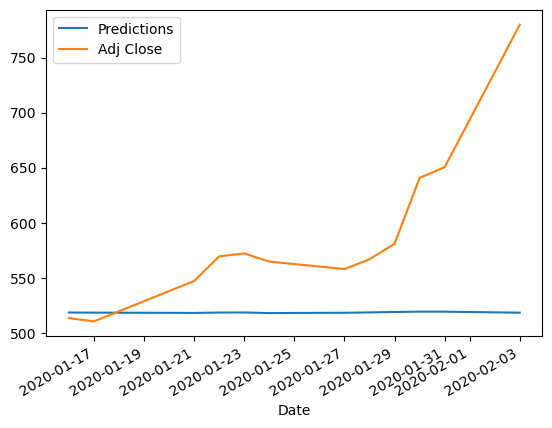

In [16]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# Create dataframe of Predictions
predictions_df = pd.DataFrame(predictions)
predictions_df.index = ['2020-01-16', '2020-01-17', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03']
predictions_df.index = pd.to_datetime(predictions_df.index)

# plot predictions and actual values 
predictions_df.plot(legend = True) 
test['Adj Close'].plot(legend = True)

In [17]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
print("RMSE on Test Data: ", rmse(test["Adj Close"], predictions))
  
# Calculate mean squared error 
print("MSE on Test Data: ", mean_squared_error(test["Adj Close"], predictions))

RMSE on Test Data:  98.63779514836838
MSE on Test Data:  9729.414631731486


# Forecast using ARIMA Model


In [18]:
# Train the model on the full dataset 
model = model = SARIMAX(data['Adj Close'],  
                        order = (1, 0, 2),  
                        seasonal_order =(0, 1, 1, 12)) 
    
result = model.fit() 
  
# Forecast for the next 1 Month 
forecast = result.predict(start = len(data),  
                          end = (len(data)-1) + 1,             # +1 means 1 month advance from the last date i.e. 2nd Feb 2020
                          typ = 'levels').rename('Forecast') 

In [19]:
print("The predicted share price on the 3rd March 2020 is: {}".format(forecast.iloc[0]))

The predicted share price on the 3rd March 2020 is: 784.9868712358395
